In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config InLineBackend.figure_format = 'svg'

/home/ryan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolov2.weights',
    'threshold' : 0.45
}

tfnet = TFNet(options)

/home/ryan/Documents/code/darkflow/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.01451253890991211s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bn

In [18]:
img = cv2.imread('beckham.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result = tfnet.return_predict(img)

print(result)
img.shape

[{'label': 'person', 'confidence': 0.5884296, 'topleft': {'x': 41, 'y': 100}, 'bottomright': {'x': 379, 'y': 505}}]


(600, 464, 3)

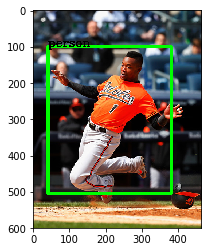

In [20]:
tl = (result[0]['topleft']['x'],result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'],result[0]['bottomright']['y'])
 

img = cv2.rectangle(img,tl,br,(0,255,0),7)
img = cv2.putText(img,label, tl,cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
plt.imshow(img)
plt.show()